# PRACTICE QUESTION

1. Use the MNIST dataset (first 1000 rows) tune the value of n_neighbors parameter for Isomap (n_components=5) with a 
decision tree classifier.
2. For the selected parameter, plot the accuracies on the test data for n_components = [2,5,10,20,50,100]
3. Use PCA and plot the accuracies on the test data for n_components = [2,5,10,20,50,100]. 
4. Compare the results of Q2 and Q3.

In [31]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
data = pd.read_csv('mnist_data.csv', names=range(784), header=None)
labels = pd.read_csv('mnist_labels.csv', names=['labels'])
data = data.loc[:1000]
labels = labels.loc[:1000]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=5)

In [53]:
for k in range(1,10):
    
    # Data Transformation
    isomap = Isomap(n_neighbors=k, n_components=5)
    train_data = isomap.fit_transform(X_train)
    val_data = isomap.transform(X_val)
    
    # Model
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(train_data, y_train)
    pred = clf.predict(val_data)
    print ('Validation accuracy for neighbors ', str(k), ' = ', accuracy_score(pred, y_val))

Validation accuracy for neighbors  1  =  0.2
Validation accuracy for neighbors  2  =  0.70625
Validation accuracy for neighbors  3  =  0.7375
Validation accuracy for neighbors  4  =  0.70625
Validation accuracy for neighbors  5  =  0.75625
Validation accuracy for neighbors  6  =  0.6625
Validation accuracy for neighbors  7  =  0.6375
Validation accuracy for neighbors  8  =  0.66875
Validation accuracy for neighbors  9  =  0.75625


In [54]:
#k=5

X_train_val = np.concatenate((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val))

# Data Transformation
isomap = Isomap(n_neighbors=5, n_components=5)
train_val_data = isomap.fit_transform(X_train_val)
test_data = isomap.transform(X_test)

# Model
clf = DecisionTreeClassifier()
clf.fit(train_val_data, y_train_val)
pred = clf.predict(test_data)
print ('Test accuracy ', ' = ', accuracy_score(pred, y_test))

Test accuracy   =  0.761194029851


In [55]:
result_isomap=[]
for n in [2,5,10,20,50,100]:
    
    # Data Transformation
    isomap = Isomap(n_neighbors=5, n_components=n)
    train_data = isomap.fit_transform(X_train)
    test_data = isomap.transform(X_test)
    
    # Model
    clf = DecisionTreeClassifier()
    clf.fit(train_data, y_train)
    pred = clf.predict(test_data)
    result_isomap.append(accuracy_score(pred, y_test))

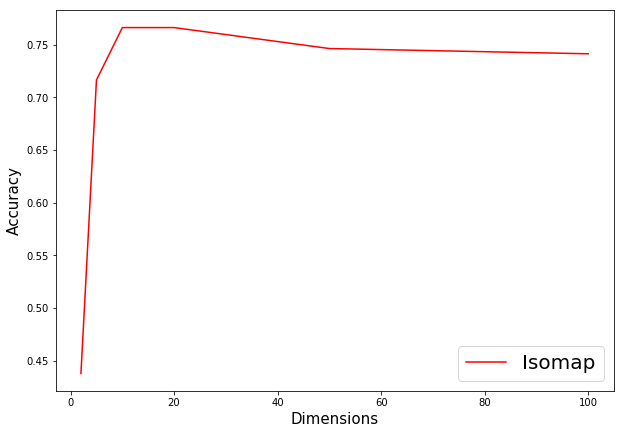

In [56]:
plt.figure(figsize=(10,7))
plt.xlabel('Dimensions', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.plot([2,5,10,20,50,100], result_isomap, 'r-', label='Isomap')
plt.legend(loc=4, prop={'size':20})

In [65]:
result_pca=[]

# Data Transformation
pca = PCA(n_components=100)
X_train_new = pd.DataFrame(pca.fit_transform(X_train))
X_test_new = pd.DataFrame(pca.transform(X_test))

for n in [2,5,10,20,50,100]:
    
    train_data = X_train_new[X_train_new.columns[:n]]
    test_data = X_test_new[X_train_new.columns[:n]]
    
    #Model
    clf = DecisionTreeClassifier()
    clf.fit(train_data, y_train)
    pred = clf.predict(test_data)
    result_pca.append(accuracy_score(pred, y_test))

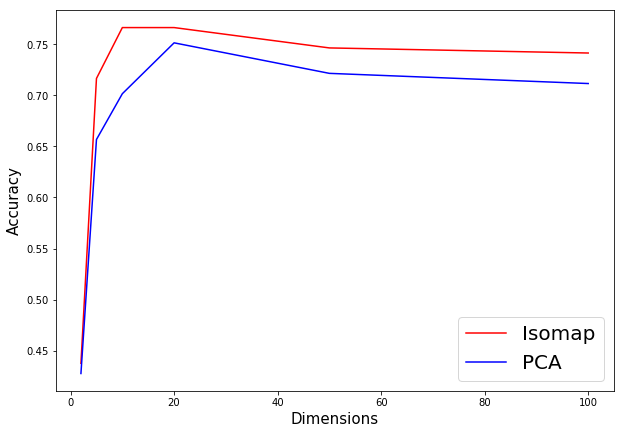

In [66]:
plt.figure(figsize=(10,7))
plt.xlabel('Dimensions', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.plot([2,5,10,20,50,100], result_isomap, 'r-', label='Isomap')
plt.plot([2,5,10,20,50,100], result_pca, 'b-', label='PCA')
plt.legend(loc=4, prop={'size':20})